In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import wrangle
import explore


In [2]:
def get_kickstarter_data():
    '''
    Grab our data from path and read as dataframe
    '''
    
    df = pd.read_csv('KickStarter.csv')
    
    return df

In [3]:
df = get_kickstarter_data()

In [4]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
df.currency.value_counts()

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [8]:
def missing_zero_values_table(df):
    '''This function will look at any data set and report back on zeros and nulls for every column while also giving percentages of total values
        and also the data types. The message prints out the shape of the data frame and also tells you how many columns have nulls '''
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    null_count = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, null_count, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0 : 'Zero Values', 1 : 'null_count', 2 : '% of Total Values'})
    mz_table['Total Zeroes + Null Values'] = mz_table['Zero Values'] + mz_table['null_count']
    mz_table['% Total Zero + Null Values'] = 100 * mz_table['Total Zeroes + Null Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[
        mz_table.iloc[:,1] >= 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " +  str((mz_table['null_count'] != 0).sum()) +
          " columns that have NULL values.")
    return mz_table

In [9]:
mz_table = missing_zero_values_table(df)

Your selected dataframe has 15 columns and 378661 Rows.
There are 2 columns that have NULL values.


In [10]:
mz_table.head(15)

,Zero Values,null_count,% of Total Values,Total Zeroes + Null Values,% Total Zero + Null Values,Data Type
usd pledged,68112,3797,1.0,71909,19.0,float64
name,0,4,0.0,4,0.0,object
ID,0,0,0.0,0,0.0,int64
category,0,0,0.0,0,0.0,object
main_category,0,0,0.0,0,0.0,object
currency,0,0,0.0,0,0.0,object
deadline,0,0,0.0,0,0.0,object
goal,0,0,0.0,0,0.0,float64
launched,0,0,0.0,0,0.0,object
pledged,52527,0,0.0,52527,13.9,float64


In [11]:
df.name.isnull().sum()

4

In [12]:
df['usd pledged'].isnull().sum()

3797

In [13]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [14]:
df.shape

(378661, 15)

In [15]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = 1):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [16]:
df = handle_missing_values(df, prop_required_column = .5, prop_required_row = 1)

In [17]:
df.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [18]:
df.shape

(374860, 15)

In [19]:
378661 - 374860

3801

In [20]:
mz_table = missing_zero_values_table(df)

Your selected dataframe has 15 columns and 374860 Rows.
There are 0 columns that have NULL values.


In [21]:
mz_table 

,Zero Values,null_count,% of Total Values,Total Zeroes + Null Values,% Total Zero + Null Values,Data Type
ID,0,0,0.0,0,0.0,int64
name,0,0,0.0,0,0.0,object
category,0,0,0.0,0,0.0,object
main_category,0,0,0.0,0,0.0,object
currency,0,0,0.0,0,0.0,object
deadline,0,0,0.0,0,0.0,object
goal,0,0,0.0,0,0.0,float64
launched,0,0,0.0,0,0.0,object
pledged,51808,0,0.0,51808,13.8,float64
state,0,0,0.0,0,0.0,object


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                374860 non-null  int64  
 1   name              374860 non-null  object 
 2   category          374860 non-null  object 
 3   main_category     374860 non-null  object 
 4   currency          374860 non-null  object 
 5   deadline          374860 non-null  object 
 6   goal              374860 non-null  float64
 7   launched          374860 non-null  object 
 8   pledged           374860 non-null  float64
 9   state             374860 non-null  object 
 10  backers           374860 non-null  int64  
 11  country           374860 non-null  object 
 12  usd pledged       374860 non-null  float64
 13  usd_pledged_real  374860 non-null  float64
 14  usd_goal_real     374860 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 45.8+ MB


In [23]:
df = df.drop(columns = ['pledged', 'usd pledged', 'goal', 'ID', 'name', 'category'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   main_category     374860 non-null  object 
 1   currency          374860 non-null  object 
 2   deadline          374860 non-null  object 
 3   launched          374860 non-null  object 
 4   state             374860 non-null  object 
 5   backers           374860 non-null  int64  
 6   country           374860 non-null  object 
 7   usd_pledged_real  374860 non-null  float64
 8   usd_goal_real     374860 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 28.6+ MB


<AxesSubplot:>

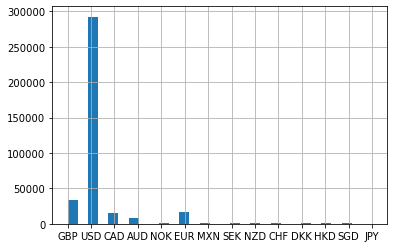

In [25]:
df.currency.hist(bins= 30)

<AxesSubplot:>

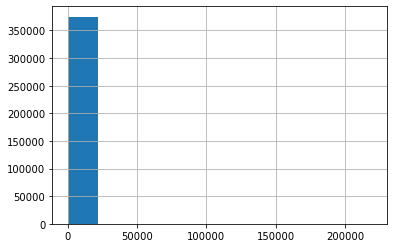

In [26]:
df.backers.hist()

In [27]:
df.state.value_counts()

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64

<AxesSubplot:>

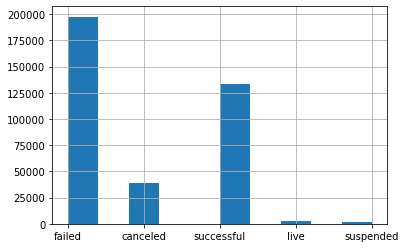

In [28]:
df.state.hist()

In [29]:
df.drop(df.index[df['state'] == 'canceled'], inplace = True)
df.drop(df.index[df['state'] == 'live'], inplace = True)
df.drop(df.index[df['state'] == 'suspended'], inplace = True)

In [30]:
df.state.value_counts()

failed        197611
successful    133851
Name: state, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 0 to 378660
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   main_category     331462 non-null  object 
 1   currency          331462 non-null  object 
 2   deadline          331462 non-null  object 
 3   launched          331462 non-null  object 
 4   state             331462 non-null  object 
 5   backers           331462 non-null  int64  
 6   country           331462 non-null  object 
 7   usd_pledged_real  331462 non-null  float64
 8   usd_goal_real     331462 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 25.3+ MB


In [32]:
from sklearn.model_selection import train_test_split
def data_split(df, stratify_by='state'):
    '''
    this function takes in a dataframe and splits it into 3 samples, 
    a test, which is 20% of the entire dataframe, 
    a validate, which is 24% of the entire dataframe,
    and a train, which is 56% of the entire dataframe. 
    It then splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 3 dataframes and 3 series:
    X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test. 
    '''
    # split df into test (20%) and train_validate (80%)
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)

    # split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=['state'])
    y_train = train['state']
    
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate.drop(columns=['state'])
    y_validate = validate['state']
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=['state'])
    y_test = test['state']
    
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test


In [33]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = data_split(df, stratify_by='state')

In [34]:
train.shape

(185618, 9)

In [35]:
validate.shape

(79551, 9)

In [36]:
test.shape

(66293, 9)

<AxesSubplot:>

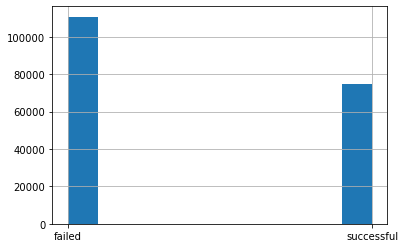

In [37]:
train.state.hist()

In [38]:
df.shape

(331462, 9)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 0 to 378660
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   main_category     331462 non-null  object 
 1   currency          331462 non-null  object 
 2   deadline          331462 non-null  object 
 3   launched          331462 non-null  object 
 4   state             331462 non-null  object 
 5   backers           331462 non-null  int64  
 6   country           331462 non-null  object 
 7   usd_pledged_real  331462 non-null  float64
 8   usd_goal_real     331462 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 25.3+ MB


In [40]:
# Make objects into numerics.
# Make more features (launch and deadline diff, goal/backers)

In [41]:
cat_vars = ['category','currency', 'main_category', 'country']
quant_vars = ['backers', 'deadline', 'launched', 'usd_pledged_real', 'usd_goal_real']
target = 'state'

In [42]:
from explore import explore_univariate

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 0 to 378660
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   main_category     331462 non-null  object 
 1   currency          331462 non-null  object 
 2   deadline          331462 non-null  object 
 3   launched          331462 non-null  object 
 4   state             331462 non-null  object 
 5   backers           331462 non-null  int64  
 6   country           331462 non-null  object 
 7   usd_pledged_real  331462 non-null  float64
 8   usd_goal_real     331462 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 25.3+ MB


In [44]:
df.main_category.value_counts()

Film & Video    56503
Music           45801
Publishing      35413
Games           28520
Technology      27046
Art             25640
Design          25363
Food            22054
Fashion         19774
Theater         10242
Comics           9878
Photography      9689
Crafts           7818
Journalism       4148
Dance            3573
Name: main_category, dtype: int64

In [45]:
def set_cat_to_num(df):
    if (df['main_category'] == 'Film & Video'):
        return 1
    elif (df['main_category'] == 'Music'):
        return 2
    elif (df['main_category'] == 'Publishing'):
        return 3
    elif (df['main_category'] == 'Games'):
        return 4
    elif (df['main_category'] == 'Technology'):
        return 5
    elif (df['main_category'] == 'Art'):
        return 6
    elif (df['main_category'] == 'Design'):
        return 7
    elif (df['main_category'] == 'Food'):
        return 8
    elif (df['main_category'] == 'Fashion'):
        return 9
    elif (df['main_category'] == 'Theater'):
        return 10
    elif (df['main_category'] == 'Comics'):
        return 11
    elif (df['main_category'] == 'Photography'):
        return 12
    elif (df['main_category'] == 'Crafts'):
        return 13
    elif (df['main_category'] == 'Journalism'):
        return 14
    elif (df['main_category'] == 'Dance'):
        return 15
df['main_category_val'] = df.apply(set_cat_to_num, axis = 1)
df = df.drop(columns = ['main_category'])

In [46]:
df.main_category_val.value_counts()

1     56503
2     45801
3     35413
4     28520
5     27046
6     25640
7     25363
8     22054
9     19774
10    10242
11     9878
12     9689
13     7818
14     4148
15     3573
Name: main_category_val, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 0 to 378660
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   currency           331462 non-null  object 
 1   deadline           331462 non-null  object 
 2   launched           331462 non-null  object 
 3   state              331462 non-null  object 
 4   backers            331462 non-null  int64  
 5   country            331462 non-null  object 
 6   usd_pledged_real   331462 non-null  float64
 7   usd_goal_real      331462 non-null  float64
 8   main_category_val  331462 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 25.3+ MB


In [48]:
df.currency.value_counts()

USD    261358
GBP     29453
EUR     14357
CAD     12370
AUD      6616
SEK      1509
MXN      1411
NZD      1274
DKK       926
CHF       652
NOK       582
HKD       477
SGD       454
JPY        23
Name: currency, dtype: int64

In [49]:
def set_curr_to_num(df):
    if (df['currency'] == 'USD'):
        return 1
    elif (df['currency'] == 'GBP'):
        return 2
    elif (df['currency'] == 'EUR'):
        return 3
    elif (df['currency'] == 'CAD'):
        return 4
    elif (df['currency'] == 'AUD'):
        return 5
    elif (df['currency'] == 'SEK'):
        return 6
    elif (df['currency'] == 'MXN'):
        return 7
    elif (df['currency'] == 'NZD'):
        return 8
    elif (df['currency'] == 'DKK'):
        return 9
    elif (df['currency'] == 'CHF'):
        return 10
    elif (df['currency'] == 'NOK'):
        return 11
    elif (df['currency'] == 'HKD'):
        return 12
    elif (df['currency'] == 'SGD'):
        return 13
    elif (df['currency'] == 'JPY'):
        return 14
df['currency_type_val'] = df.apply(set_curr_to_num, axis = 1)
df = df.drop(columns = ['currency'])

In [50]:
df.currency_type_val.value_counts()

1     261358
2      29453
3      14357
4      12370
5       6616
6       1509
7       1411
8       1274
9        926
10       652
11       582
12       477
13       454
14        23
Name: currency_type_val, dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 0 to 378660
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   deadline           331462 non-null  object 
 1   launched           331462 non-null  object 
 2   state              331462 non-null  object 
 3   backers            331462 non-null  int64  
 4   country            331462 non-null  object 
 5   usd_pledged_real   331462 non-null  float64
 6   usd_goal_real      331462 non-null  float64
 7   main_category_val  331462 non-null  int64  
 8   currency_type_val  331462 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 25.3+ MB


In [52]:
df.country.value_counts()

US    261358
GB     29453
CA     12370
AU      6616
DE      3436
FR      2520
NL      2411
IT      2369
ES      1873
SE      1509
MX      1411
NZ      1274
DK       926
IE       683
CH       652
NO       582
BE       523
AT       485
HK       477
SG       454
LU        57
JP        23
Name: country, dtype: int64

In [53]:
def set_country_to_num(df):
    if (df['country'] == 'US'):
        return 1
    elif (df['country'] == 'GB'):
        return 2
    elif (df['country'] == 'CA'):
        return 3
    elif (df['country'] == 'AU'):
        return 4
    elif (df['country'] == 'DE'):
        return 5
    elif (df['country'] == 'FR'):
        return 6
    elif (df['country'] == 'NL'):
        return 7
    elif (df['country'] == 'IT'):
        return 8
    elif (df['country'] == 'ES'):
        return 9
    elif (df['country'] == 'SE'):
        return 10
    elif (df['country'] == 'MX'):
        return 11
    elif (df['country'] == 'NZ'):
        return 12
    elif (df['country'] == 'DK'):
        return 13
    elif (df['country'] == 'IE'):
        return 14
    elif (df['country'] == 'CH'):
        return 15
    elif (df['country'] == 'NO'):
        return 16
    elif (df['country'] == 'BE'):
        return 17
    elif (df['country'] == 'AT'):
        return 18
    elif (df['country'] == 'HK'):
        return 19
    elif (df['country'] == 'SG'):
        return 20
    elif (df['country'] == 'LU'):
        return 21
    elif (df['country'] == 'JP'):
        return 22
df['country_name_val'] = df.apply(set_country_to_num, axis = 1)
df = df.drop(columns = ['country'])

In [54]:
df.country_name_val.value_counts()

1     261358
2      29453
3      12370
4       6616
5       3436
6       2520
7       2411
8       2369
9       1873
10      1509
11      1411
12      1274
13       926
14       683
15       652
16       582
17       523
18       485
19       477
20       454
21        57
22        23
Name: country_name_val, dtype: int64

In [55]:
df.head()

,deadline,launched,state,backers,usd_pledged_real,usd_goal_real,main_category_val,currency_type_val,country_name_val
0,2015-10-09,2015-08-11 12:12:28,failed,0,0.0,1533.95,3,2,2
1,2017-11-01,2017-09-02 04:43:57,failed,15,2421.0,30000.00,1,1,1
2,2013-02-26,2013-01-12 00:20:50,failed,3,220.0,45000.00,1,1,1
3,2012-04-16,2012-03-17 03:24:11,failed,1,1.0,5000.00,2,1,1
5,2016-04-01,2016-02-26 13:38:27,successful,224,52375.0,50000.00,8,1,1


In [56]:
def get_dummies(df):
    df = pd.get_dummies(df, columns=['state'], dtype = int)
    return df 

In [57]:
df = get_dummies(df)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 0 to 378660
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   deadline           331462 non-null  object 
 1   launched           331462 non-null  object 
 2   backers            331462 non-null  int64  
 3   usd_pledged_real   331462 non-null  float64
 4   usd_goal_real      331462 non-null  float64
 5   main_category_val  331462 non-null  int64  
 6   currency_type_val  331462 non-null  int64  
 7   country_name_val   331462 non-null  int64  
 8   state_failed       331462 non-null  int64  
 9   state_successful   331462 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 27.8+ MB


In [59]:
df.deadline.value_counts

<bound method IndexOpsMixin.value_counts of 0         2015-10-09
1         2017-11-01
2         2013-02-26
3         2012-04-16
5         2016-04-01
             ...    
378654    2017-04-19
378657    2011-07-19
378658    2010-08-16
378659    2016-02-13
378660    2011-08-16
Name: deadline, Length: 331462, dtype: object>

In [60]:
df.launched.value_counts

<bound method IndexOpsMixin.value_counts of 0         2015-08-11 12:12:28
1         2017-09-02 04:43:57
2         2013-01-12 00:20:50
3         2012-03-17 03:24:11
5         2016-02-26 13:38:27
                 ...         
378654    2017-03-20 22:08:22
378657    2011-06-22 03:35:14
378658    2010-07-01 19:40:30
378659    2016-01-13 18:13:53
378660    2011-07-19 09:07:47
Name: launched, Length: 331462, dtype: object>

In [61]:
df.launched = pd.to_datetime(df.launched)

In [62]:
df.deadline = pd.to_datetime(df.deadline)

In [63]:
df1 = pd.DataFrame([int(i.days) for i in (df.deadline - df.launched)])

In [64]:
df1.head()

,0
0,58
1,59
2,44
3,29
4,34


In [65]:
df1.columns=['number_of_days']

In [66]:
df1.head()

,number_of_days
0,58
1,59
2,44
3,29
4,34


In [67]:
df.reset_index(drop = True)

,deadline,launched,backers,usd_pledged_real,usd_goal_real,main_category_val,currency_type_val,country_name_val,state_failed,state_successful
0,2015-10-09,2015-08-11 12:12:28,0,0.0,1533.95,3,2,2,1,0
1,2017-11-01,2017-09-02 04:43:57,15,2421.0,30000.00,1,1,1,1,0
2,2013-02-26,2013-01-12 00:20:50,3,220.0,45000.00,1,1,1,1,0
3,2012-04-16,2012-03-17 03:24:11,1,1.0,5000.00,2,1,1,1,0
4,2016-04-01,2016-02-26 13:38:27,224,52375.0,50000.00,8,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
331457,2017-04-19,2017-03-20 22:08:22,4,154.0,6500.00,8,1,1,1,0
331458,2011-07-19,2011-06-22 03:35:14,5,155.0,1500.00,1,1,1,1,0
331459,2010-08-16,2010-07-01 19:40:30,1,20.0,15000.00,1,1,1,1,0
331460,2016-02-13,2016-01-13 18:13:53,6,200.0,15000.00,5,1,1,1,0


In [68]:
df = df.join(df1, how="inner")

In [69]:
df.head(20)

,deadline,launched,backers,usd_pledged_real,usd_goal_real,main_category_val,currency_type_val,country_name_val,state_failed,state_successful,number_of_days
0,2015-10-09,2015-08-11 12:12:28,0,0.00,1533.95,3,2,2,1,0,58
1,2017-11-01,2017-09-02 04:43:57,15,2421.00,30000.00,1,1,1,1,0,59
2,2013-02-26,2013-01-12 00:20:50,3,220.00,45000.00,1,1,1,1,0,44
3,2012-04-16,2012-03-17 03:24:11,1,1.00,5000.00,2,1,1,1,0,29
5,2016-04-01,2016-02-26 13:38:27,224,52375.00,50000.00,8,1,1,0,1,19
6,2014-12-21,2014-12-01 18:30:44,16,1205.00,1000.00,8,1,1,0,1,44
7,2016-03-17,2016-02-01 20:05:12,40,453.00,25000.00,8,1,1,1,0,29
10,2013-10-09,2013-09-09 18:19:37,0,0.00,2406.39,3,4,3,1,0,44
11,2013-04-08,2013-03-09 06:42:58,100,12700.00,12500.00,2,1,1,0,1,27
12,2014-10-02,2014-09-02 17:11:50,0,0.00,5000.00,13,1,1,1,0,29


In [70]:
# Days are added by 1 to include deadline date.

In [71]:
df.deadline.max()

Timestamp('2018-01-02 00:00:00')

In [72]:
df.deadline.min()

Timestamp('2009-05-03 00:00:00')

In [73]:
df.launched.max()

Timestamp('2017-12-28 01:48:58')

In [74]:
df.launched.min()

Timestamp('2009-04-21 21:02:48')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290157 entries, 0 to 331461
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   deadline           290157 non-null  datetime64[ns]
 1   launched           290157 non-null  datetime64[ns]
 2   backers            290157 non-null  int64         
 3   usd_pledged_real   290157 non-null  float64       
 4   usd_goal_real      290157 non-null  float64       
 5   main_category_val  290157 non-null  int64         
 6   currency_type_val  290157 non-null  int64         
 7   country_name_val   290157 non-null  int64         
 8   state_failed       290157 non-null  int64         
 9   state_successful   290157 non-null  int64         
 10  number_of_days     290157 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(7)
memory usage: 26.6 MB


In [76]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

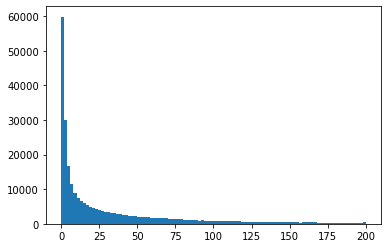

In [77]:
plt.hist(df.backers, 100, range=[0, 200], align='mid')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

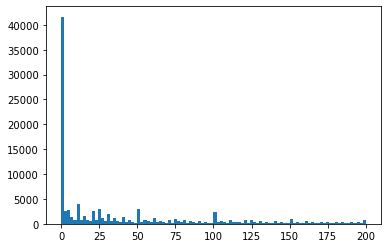

In [78]:
plt.hist(df.usd_pledged_real, 100, range=[0, 200], align='mid')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

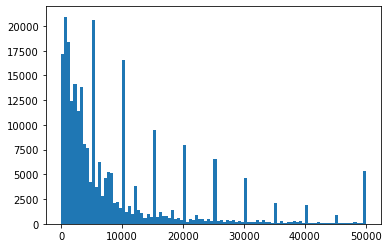

In [79]:
plt.hist(df.usd_goal_real, 100, range=[0, 50000], align='mid')
plt.show

<AxesSubplot:>

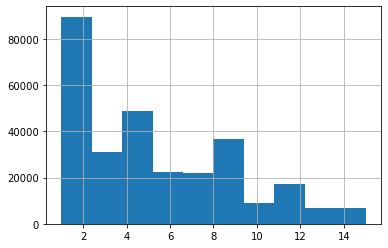

In [80]:
df.main_category_val.hist()

<AxesSubplot:>

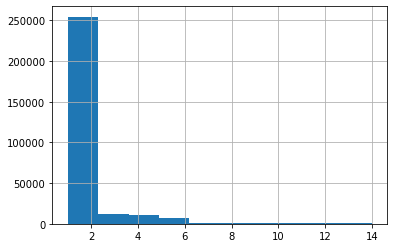

In [81]:
df.currency_type_val.hist()

<AxesSubplot:>

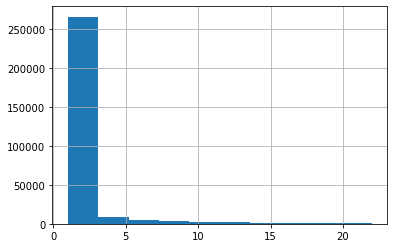

In [82]:
df.country_name_val.hist()

<AxesSubplot:>

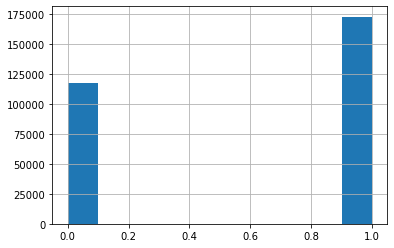

In [83]:
df.state_failed.hist()

In [84]:
df.state_failed.value_counts()

1    172899
0    117258
Name: state_failed, dtype: int64

<AxesSubplot:>

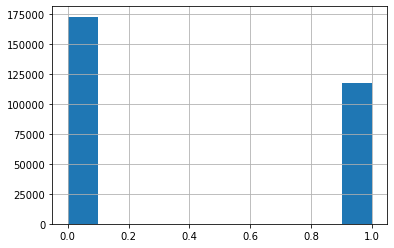

In [85]:
df.state_successful.hist()

In [86]:
df.state_successful.value_counts()

0    172899
1    117258
Name: state_successful, dtype: int64

In [87]:
117258/172899*100

67.81878437700622

In [88]:
100 - 67.81878437700622

32.181215622993776

### Findings
- I found that 67.82 percent of all projects failed beteen the years of 2009 and 2018.
- Only 32.18 percent of all projects between 2009 and 2018 have been succesful. (So what now? I want to look in deeper at what features cause certine projects to be succeful or failed in there are any.)


<AxesSubplot:>

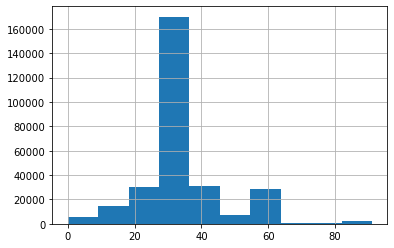

In [89]:
df.number_of_days.hist()

In [ ]:
sns.pairplot(df, hue="state_successful", diag_kind="hist")

KeyboardInterrupt: 

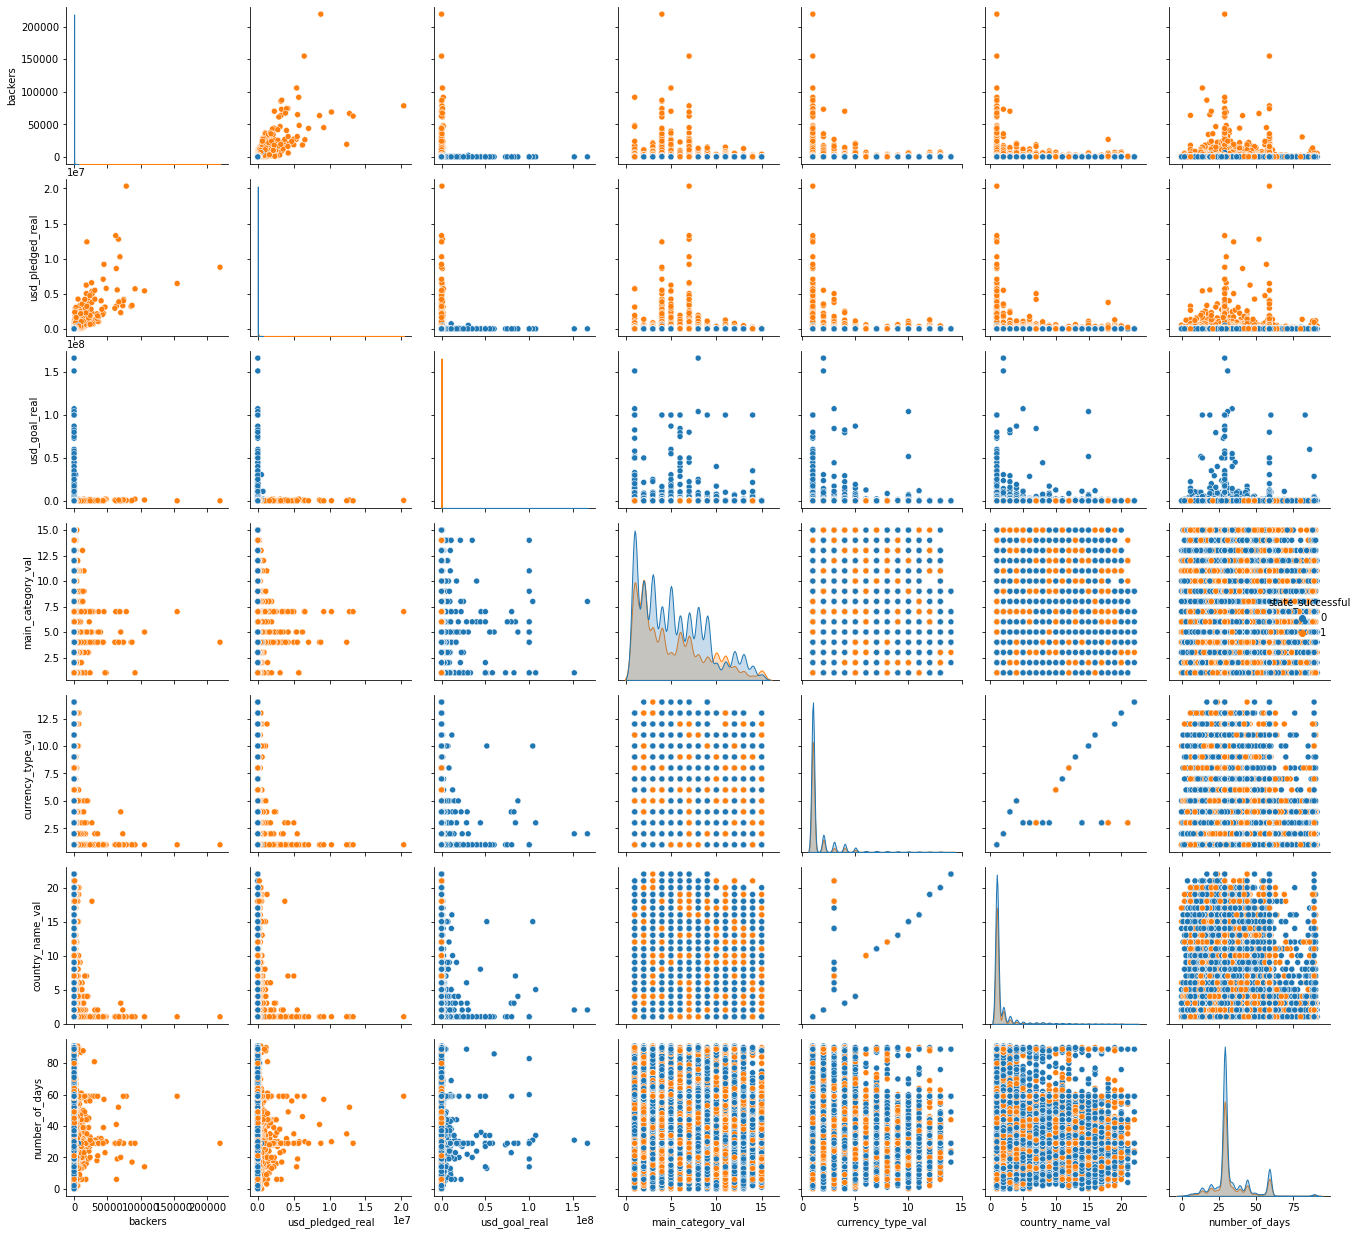

In [92]:
sns.pairplot(
    df,
    x_vars=["backers", "usd_pledged_real", "usd_goal_real", "main_category_val",
        "currency_type_val", "country_name_val", "number_of_days"],
    y_vars=["backers", "usd_pledged_real", "usd_goal_real", "main_category_val",
        "currency_type_val", "country_name_val", "number_of_days"],
    hue = 'state_successful'
)

In [94]:
corr = df.corr()

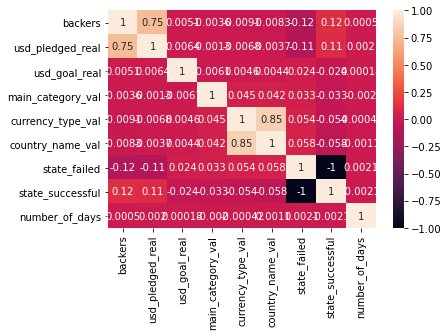

In [98]:
sns.heatmap(corr, annot=True)
plt.show()

In [102]:
x_vars=["backers", "usd_pledged_real", "usd_goal_real", "main_category_val",
        "currency_type_val", "country_name_val", "number_of_days"]

In [112]:
df2 = pd.DataFrame(corr.state_successful)

In [113]:
df2 

,state_successful
backers,0.122394
usd_pledged_real,0.105677
usd_goal_real,-0.023620
main_category_val,-0.032921
currency_type_val,-0.053505
country_name_val,-0.057521
state_failed,-1.000000
state_successful,1.000000
number_of_days,-0.002142
